In [1]:
from main import *
from bovw import *
from plotting import *

In [2]:
import os
import random
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

In [4]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [5]:
data_train = Dataset(ImageFolder="../data/places_reduced/train")
data_test = Dataset(ImageFolder="../data/places_reduced/val")

len(data_train), len(data_test)

(8700, 2200)

In [6]:
random.shuffle(data_train)
random.shuffle(data_test)

In [9]:
normalization_results = {}

for descriptor_normalization in [None, "L1", "L2", "Root"]:
    bovw_params = {
        "detector_type": "SIFT",
        "codebook_size": 512,
        "descriptor_normalization": descriptor_normalization,
        "detector_kwargs": {"nfeatures": 1000},
    }
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "max_iter": 1000,
        "class_weight": "balanced",
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
            bovw_kwargs=bovw_params,
            classifier_cls=classifier_cls,
            classifier_kwargs=classifier_params,
            n_splits=5
    )
    
    normalization_results[descriptor_normalization] = scores
    
    normalization_results[descriptor_normalization] = scores
    
    # print(f"[SIFT descriptor_normalization={descriptor_normalization}] Results:")
    # print(f"  Train Accuracy:  {scores.train.accuracy.mean:.4f} ± {scores.train.accuracy.std:.4f}")
    # print(f"  Test Accuracy:   {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")
    # print(f"  Test Precision:  {scores.val.precision.mean:.4f} ± {scores.val.precision.std:.4f}")
    # print(f"  Test Recall:     {scores.val.recall.mean:.4f} ± {scores.val.recall.std:.4f}")
    # print(f"  Test F1-Score:   {scores.val.f1.mean:.4f} ± {scores.val.f1.std:.4f}")


print("\nSIFT SUMMARY")
for norm in normalization_results.keys():
    print(f"descriptor_normalization={norm} -> Accuracy Train: {normalization_results[norm].train.accuracy.mean:.4f} ± {normalization_results[norm].train.accuracy.std:.4f}")
    print(f"descriptor_normalization={norm} -> Accuracy Test: {normalization_results[norm].val.accuracy.mean:.4f} ± {normalization_results[norm].val.accuracy.std:.4f}")
    print()

Phase [Setup]: Extracting the descriptors:  50%|█████     | 4353/8700 [00:01<00:01, 2719.52it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2690.09it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4322/8700 [00:01<00:01, 2359.18it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2367.44it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  49%|████▉     | 4268/8700 [00:01<00:01, 2387.29it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2348.45it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  51%|█████     | 4458/8700 [00:01<00:01, 2347.90it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2329.15it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [00:59<00:00, 11.90s/it]


SIFT SUMMARY
descriptor_normalization=None -> Accuracy Train: 0.4499 ± 0.0031
descriptor_normalization=None -> Accuracy Test: 0.3351 ± 0.0037

descriptor_normalization=L1 -> Accuracy Train: 0.4571 ± 0.0072
descriptor_normalization=L1 -> Accuracy Test: 0.3315 ± 0.0045

descriptor_normalization=L2 -> Accuracy Train: 0.4470 ± 0.0040
descriptor_normalization=L2 -> Accuracy Test: 0.3174 ± 0.0074

descriptor_normalization=Root -> Accuracy Train: 0.4629 ± 0.0030
descriptor_normalization=Root -> Accuracy Test: 0.3362 ± 0.0118



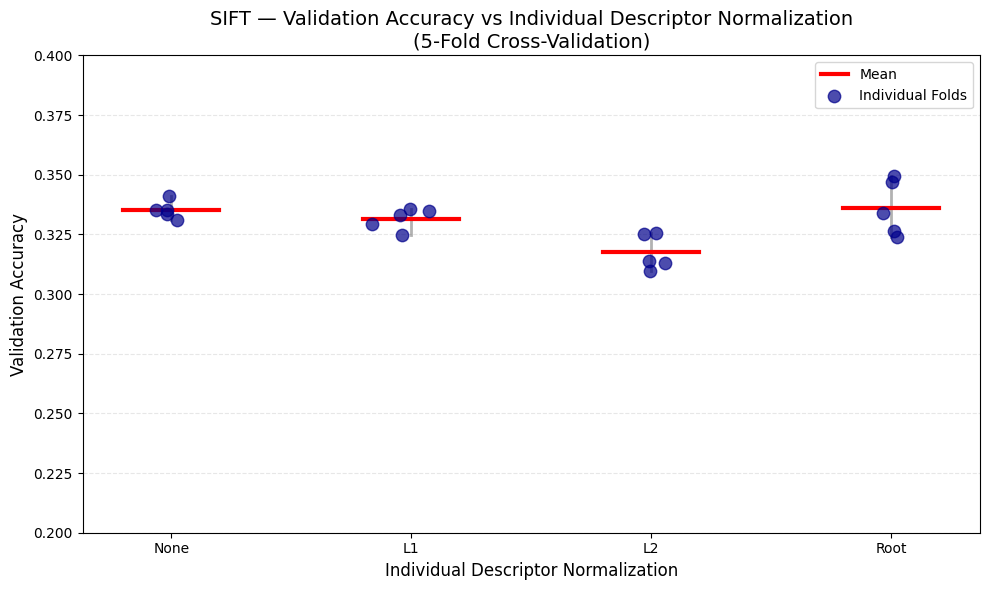

In [10]:
x_vals = [None, "L1", "L2", "Root"]
printable_x_vals = ["None", "L1", "L2", "Root"]
all_accuracies = [normalization_results[key].val.accuracy.all for key in x_vals]
plot_cv_accuracy_boxplot(printable_x_vals, all_accuracies, "SIFT", "Individual Descriptor Normalization", ylim=(0.2, 0.4))

In [11]:
normalization_results = {}

for joint_descriptor_normalization in [None, "MaxAbs", "Standard", "MinMax"]:
    bovw_params = {
        "detector_type": "SIFT",
        "codebook_size": 512,
        "joint_descriptor_normalization": joint_descriptor_normalization,
        "detector_kwargs": {"nfeatures": 1000},
    }
    
    classifier_cls = LogisticRegression
    classifier_params = {
        "max_iter": 1000,
        "class_weight": "balanced",
    }
    
    scores = cross_validate_bovw(
        dataset=data_train,
            bovw_kwargs=bovw_params,
            classifier_cls=classifier_cls,
            classifier_kwargs=classifier_params,
            n_splits=5
    )
    
    normalization_results[joint_descriptor_normalization] = scores
    
    normalization_results[joint_descriptor_normalization] = scores
    
    # print(f"[SIFT joint_descriptor_normalization={joint_descriptor_normalization}] Results:")
    # print(f"  Train Accuracy:  {scores.train.accuracy.mean:.4f} ± {scores.train.accuracy.std:.4f}")
    # print(f"  Test Accuracy:   {scores.val.accuracy.mean:.4f} ± {scores.val.accuracy.std:.4f}")
    # print(f"  Test Precision:  {scores.val.precision.mean:.4f} ± {scores.val.precision.std:.4f}")
    # print(f"  Test Recall:     {scores.val.recall.mean:.4f} ± {scores.val.recall.std:.4f}")
    # print(f"  Test F1-Score:   {scores.val.f1.mean:.4f} ± {scores.val.f1.std:.4f}")


print("\nSIFT SUMMARY")
for norm in normalization_results.keys():
    print(f"joint_descriptor_normalization={norm} -> Accuracy Train: {normalization_results[norm].train.accuracy.mean:.4f} ± {normalization_results[norm].train.accuracy.std:.4f}")
    print(f"joint_descriptor_normalization={norm} -> Accuracy Test: {normalization_results[norm].val.accuracy.mean:.4f} ± {normalization_results[norm].val.accuracy.std:.4f}")
    print()

Phase [Setup]: Extracting the descriptors:  50%|█████     | 4357/8700 [00:01<00:01, 2704.08it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2694.93it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  50%|████▉     | 4319/8700 [00:01<00:01, 2715.27it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2672.20it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  50%|█████     | 4355/8700 [00:01<00:01, 2664.46it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2690.77it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


Phase [Setup]: Extracting the descriptors:  52%|█████▏    | 4529/8700 [00:01<00:01, 2664.94it/s]

Could not compute descriptors for image ../data/places_reduced/train/water_ice_snow/iceberg_00000023.jpg of class 9.


Phase [Setup]: Extracting the descriptors: 100%|██████████| 8700/8700 [00:03<00:00, 2652.23it/s]


Could not compute descriptors for image ../data/places_reduced/train/mountains_hills_desert_sky/sky_00001410.jpg of class 5.


100%|██████████| 5/5 [01:05<00:00, 13.16s/it]


SIFT SUMMARY
joint_descriptor_normalization=None -> Accuracy Train: 0.4497 ± 0.0080
joint_descriptor_normalization=None -> Accuracy Test: 0.3303 ± 0.0132

joint_descriptor_normalization=MaxAbs -> Accuracy Train: 0.4514 ± 0.0039
joint_descriptor_normalization=MaxAbs -> Accuracy Test: 0.3249 ± 0.0091

joint_descriptor_normalization=Standard -> Accuracy Train: 0.4399 ± 0.0035
joint_descriptor_normalization=Standard -> Accuracy Test: 0.3246 ± 0.0121

joint_descriptor_normalization=MinMax -> Accuracy Train: 0.4454 ± 0.0073
joint_descriptor_normalization=MinMax -> Accuracy Test: 0.3255 ± 0.0120



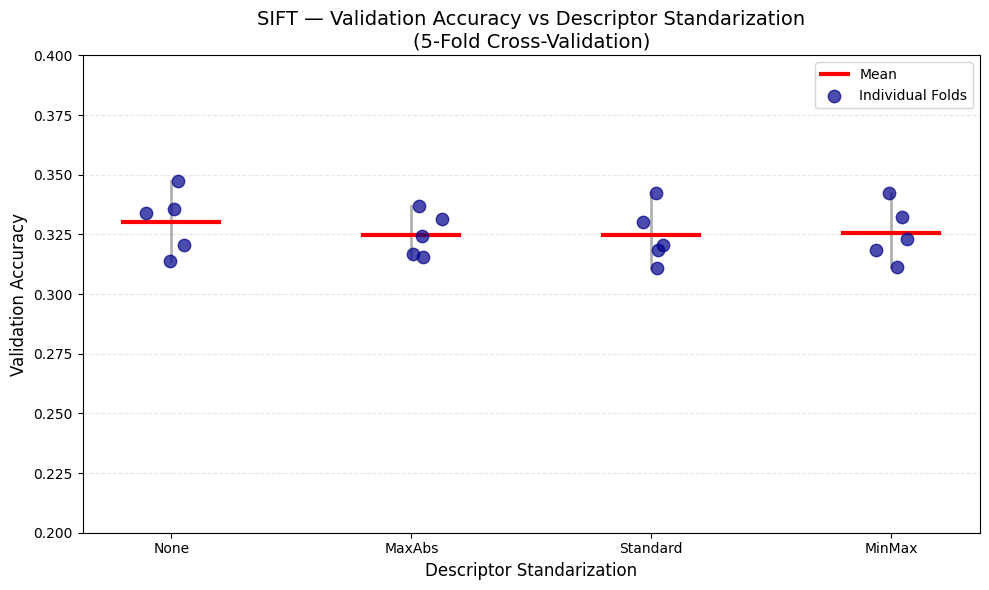

In [13]:
x_vals = [None, "MaxAbs", "Standard", "MinMax"]
printable_x_vals = ["None", "MaxAbs", "Standard", "MinMax"]
all_accuracies = [normalization_results[key].val.accuracy.all for key in x_vals]
plot_cv_accuracy_boxplot(printable_x_vals, all_accuracies, "SIFT", "Descriptor Standarization", ylim=(0.2, 0.4))